# Tariff Recommendations

At your disposal is data on the behavior of customers who have already switched to these tariffs (from the project of the course “Statistical Data Analysis”). We need to build a model for the classification task that will select the appropriate tariff. There is no need for data preprocessing - you have already done it.

Build a model with the highest possible *accuracy* value. To pass the project successfully, you need to bring the percentage of correct answers to at least 0.75. Check *accuracy* on a test sample yourself.

# Action plan

- Examine the data file
- Divide the source data into training, validation and test samples.
- Investigate the quality of different models by changing hyperparameters.
- Check the quality of the model on a test sample.
- Additional task: check the models for sanity.

## Open and examine the file

Import the required libraries and see information about the file

In [1]:
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import seaborn as sns

df = pd.read_csv('./users_behavior.csv')

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Let's build a correlation and look at the relationship

             calls   minutes  messages   mb_used  is_ultra
calls     1.000000  0.982083  0.177385  0.286442  0.207122
minutes   0.982083  1.000000  0.173110  0.280967  0.206955
messages  0.177385  0.173110  1.000000  0.195721  0.203830
mb_used   0.286442  0.280967  0.195721  1.000000  0.198568
is_ultra  0.207122  0.206955  0.203830  0.198568  1.000000


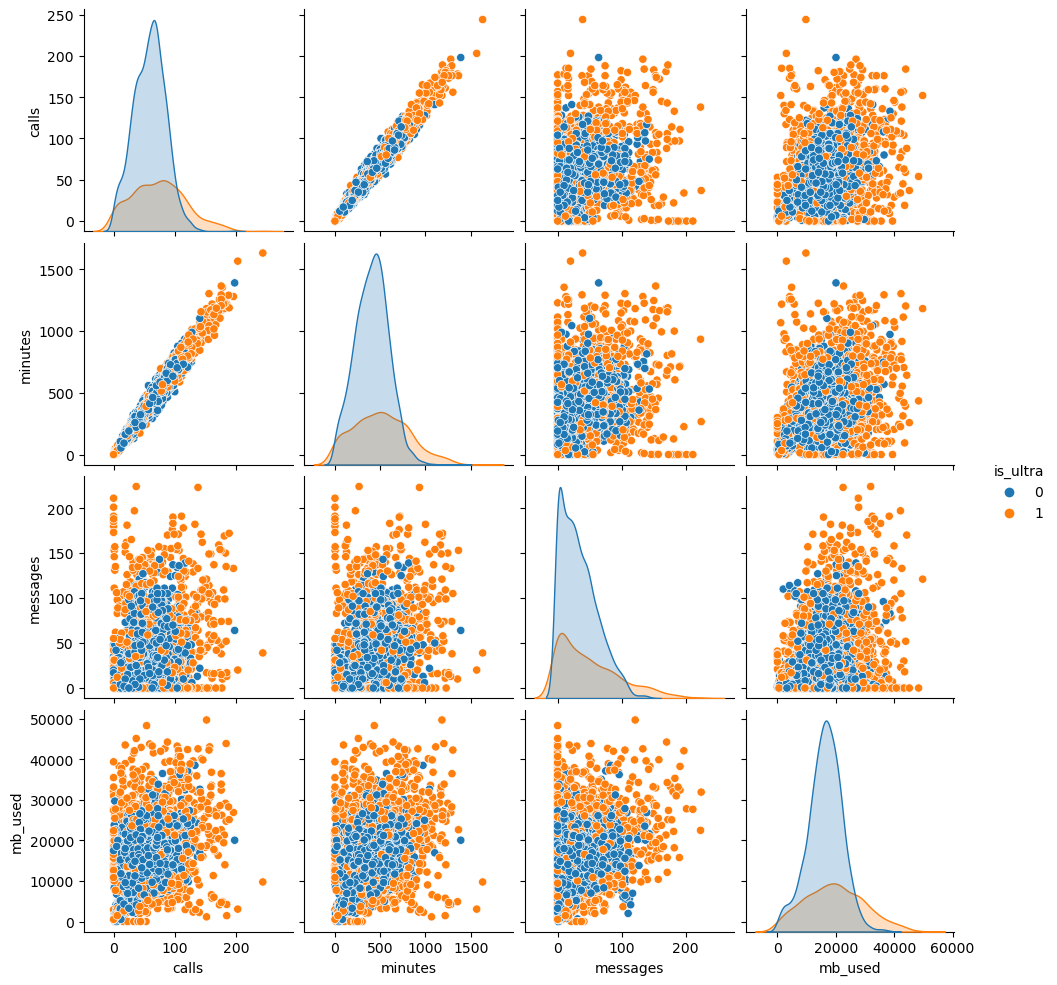

In [2]:
print(df.corr())
print(sns.pairplot(df, hue='is_ultra'))

## Break the data into samples

In [3]:
df_features = df.drop(['is_ultra'], axis=1) # признаки
df_target = df['is_ultra'] # цель

We divide it into samples (training and validation)

In [4]:
features_train, features_test_valid, \
target_train, target_test_valid = train_test_split(df_features, df_target, \
    test_size=0.4, random_state=12345)

I'll give half of the validation sample to the test sample

In [5]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test_valid, target_test_valid,\
    test_size=0.5,
    random_state=12345)

Let's look at the number of objects in each sample

In [6]:
print('Размеры выборок')
print(df_target.shape, '- генеральная выборка')
print(target_train.shape, '- обучающая выборка')
print(target_test.shape, '- тестовая выборка')
print(target_valid.shape, '- валидационная выборка')

Размеры выборок
(3214,) - генеральная выборка
(1928,) - обучающая выборка
(643,) - тестовая выборка
(643,) - валидационная выборка


## Explore models

Let's find the best hyperparameters for our model

In [9]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 101, 5):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        
        # Определяем метрику (например, точность)
        result = accuracy_score(target_valid, predictions_valid)
        
        if result > best_result:  # Изменяем условие, чтобы выбрать модель с лучшей точностью
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print(f'The best accuracy value was obtained with the number of trees - {best_est}, and depth - {best_depth}')
print('Accuracy:', accuracy_score(target_test, best_model.predict(features_test)))



The best accuracy value was obtained with the number of trees - 10, and depth - 9
Accuracy: 0.7853810264385692


## Test the model on a test sample

### Random Forest

Let's apply our hyperparameters to the test sample

In [ ]:
model = RandomForestClassifier(random_state=12345, max_depth=1, n_estimators=16)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('accuracy', accuracy_score(target_test, predictions_test))

Accuracy = 0.75. 

## (bonus) Check the models for adequacy

In [ ]:
model = DummyClassifier(strategy="most_frequent", random_state=0)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('accuracy', accuracy_score(target_valid, predictions_valid))


## Final Conclusion

In the current project, we looked at data on the behavior of customers who switched from archived tariffs to Ultra and Smart tariffs. Using this data, we built a model to predict the behavior of future customers. The probability of correct prediction for this model is 75%.